In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Whatsapp_chat.csv')

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,Unnamed: 0,hours,days,months,names,timestamp
0,0,1,19,May,Person4,2020-05-19
1,1,22,19,May,Person3,2020-05-19
2,2,22,19,May,Person3,2020-05-19
3,3,22,19,May,Person1,2020-05-19
4,4,22,19,May,Person3,2020-05-19


In [ ]:
df1.shape

(51575, 6)

In [ ]:
df1.set_index('Unnamed: 0', inplace=True)

In [ ]:
df1.index.name = 'Index'

In [ ]:
df1.head()

,hours,days,months,names,timestamp
Index,,,,,
0,1,19,May,Person4,2020-05-19
1,22,19,May,Person3,2020-05-19
2,22,19,May,Person3,2020-05-19
3,22,19,May,Person1,2020-05-19
4,22,19,May,Person3,2020-05-19


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51575 entries, 0 to 51574
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   hours      51575 non-null  int64 
 1   days       51575 non-null  int64 
 2   months     51575 non-null  object
 3   names      51575 non-null  object
 4   timestamp  51575 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


In [ ]:
df1.describe()

,hours,days
count,51575.000000,51575.000000
mean,12.041551,14.571905
std,8.152448,9.553132
min,0.000000,1.000000
25%,2.000000,7.000000
50%,14.000000,12.000000
75%,19.000000,24.000000
max,23.000000,31.000000


In [ ]:
df1.isnull().sum()

,0
hours,0
days,0
months,0
names,0
timestamp,0


# **Data looks good and clean. So we can move forward to the analysis part.**

<Axes: >

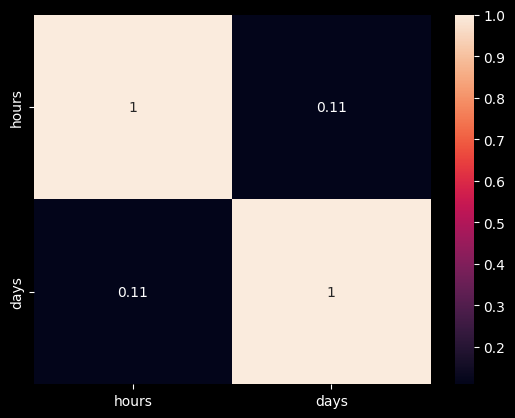

In [ ]:
matrix_corr = df1.corr(numeric_only=True)
sns.heatmap(matrix_corr, annot=True)

In [ ]:
# Most Busiest Time For Chat

busiest_time = df1['hours'].value_counts().head(15)
busiest_time

,count
hours,
1,4874
2,4780
0,4185
23,3936
20,3114
17,3044
18,2812
19,2690
16,2571


Text(0, 0.5, 'Number of Messages')

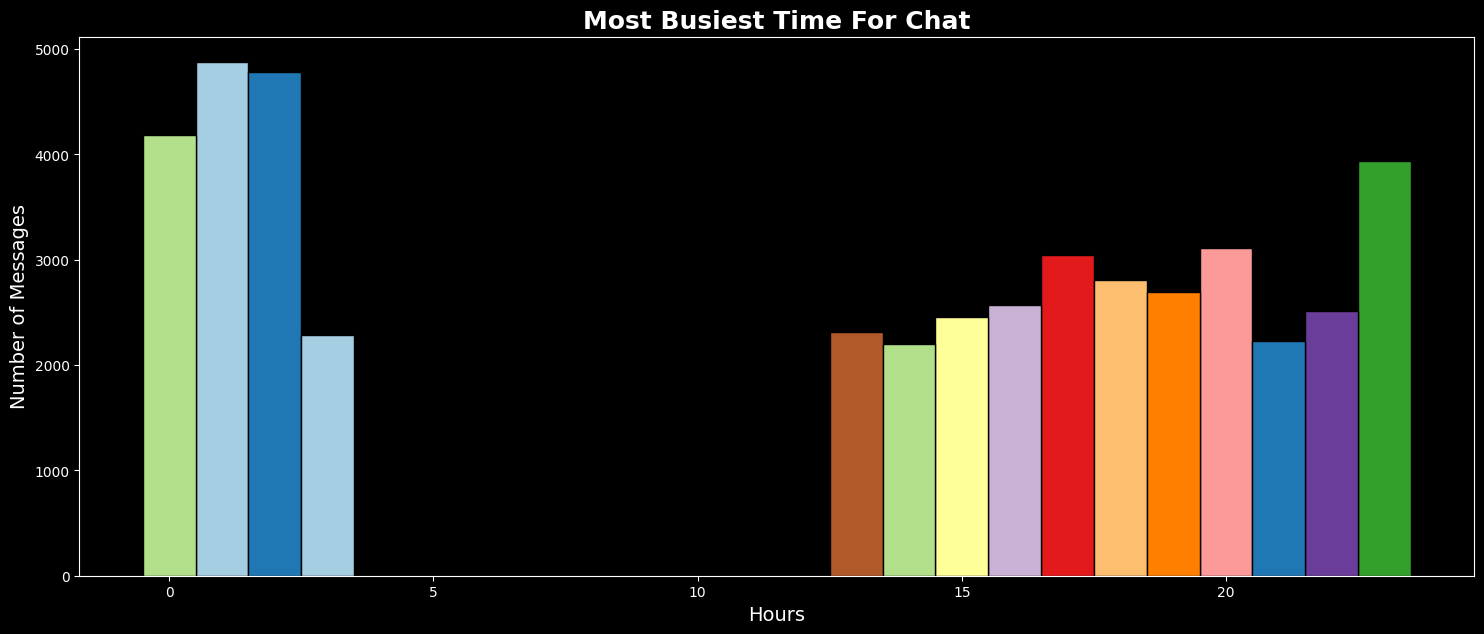

In [ ]:
plt.figure(figsize=(18, 7))
plt.bar(busiest_time.index, busiest_time.values, color=plt.cm.Paired.colors, edgecolor='black', width=1.0)
plt.title('Most Busiest Time For Chat', fontsize=18, fontweight='bold')
plt.xlabel('Hours', fontsize=14)
plt.ylabel('Number of Messages', fontsize=14)

In [ ]:
df1.head()

,hours,days,months,names,timestamp
Index,,,,,
0,1,19,May,Person4,2020-05-19
1,22,19,May,Person3,2020-05-19
2,22,19,May,Person3,2020-05-19
3,22,19,May,Person1,2020-05-19
4,22,19,May,Person3,2020-05-19


In [ ]:
# Determine the busiest days in the month for conversations.

bussiest_day = df1['days'].value_counts().head(10)
bussiest_day

,count
days,
9,3553
2,3519
10,2884
30,2773
11,2595
1,2198
3,2056
12,1962
7,1910


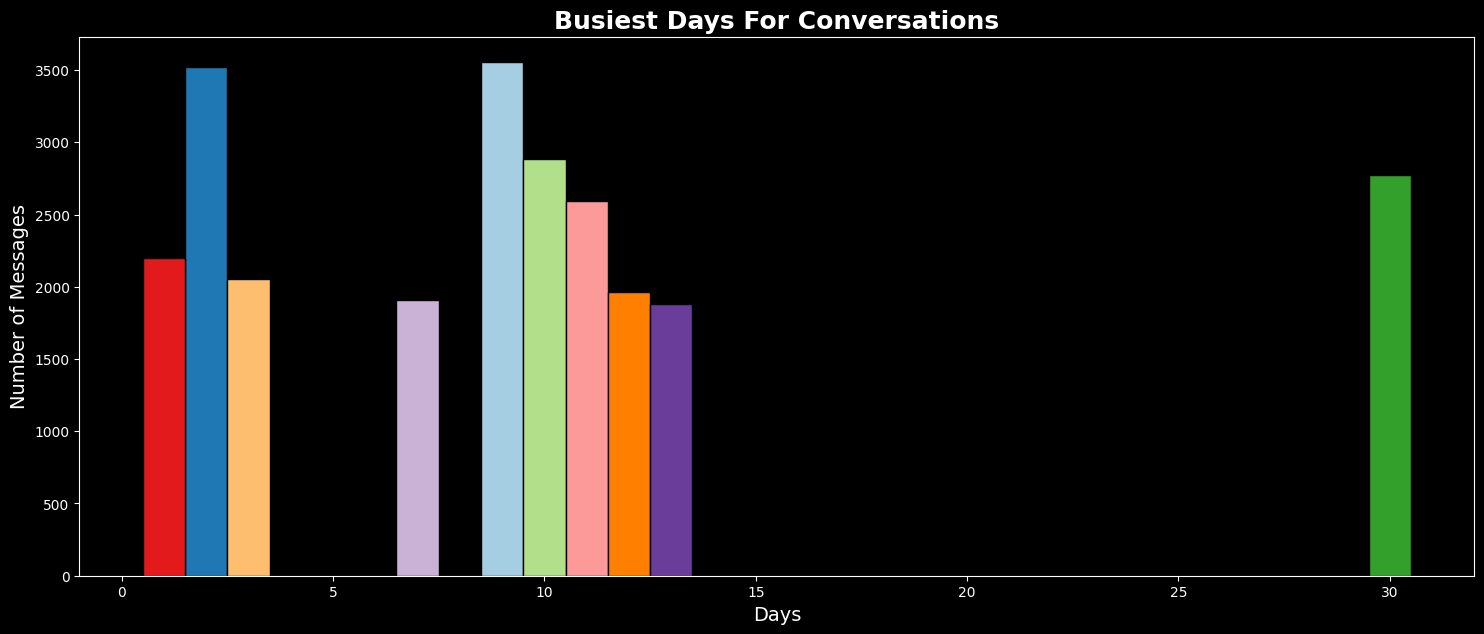

In [ ]:
plt.figure(figsize=(18, 7))
plt.bar(bussiest_day.index, bussiest_day.values, color=plt.cm.Paired.colors, edgecolor='black', width=1.0)
plt.title('Busiest Days For Conversations', fontsize=18, fontweight='bold')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Messages', fontsize=14)
plt.show()

In [ ]:
# Bussiest Month In our Chat

bussiest_month = df1['months'].value_counts()
bussiest_month

,count
months,
July,20824
June,19306
August,7658
May,3787


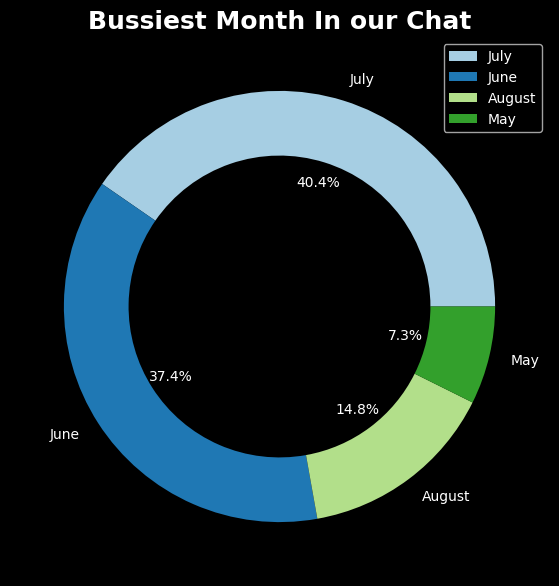

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(11, 7))
plt.pie(bussiest_month.values, labels=bussiest_month.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3), colors=plt.cm.Paired.colors)
plt.legend(loc='upper right')
plt.title('Bussiest Month In our Chat', fontsize=18, fontweight='bold')
plt.show()

In [ ]:
# Most Busy Date in our Chat

bussiest_date = df1['timestamp'].value_counts().head(10)
bussiest_date

,count
timestamp,
2020-06-09,2400
2020-07-13,1462
2020-05-30,1418
2020-06-02,1412
2020-08-02,1334
2020-08-01,1299
2020-06-22,1207
2020-07-31,1192
2020-07-11,1136


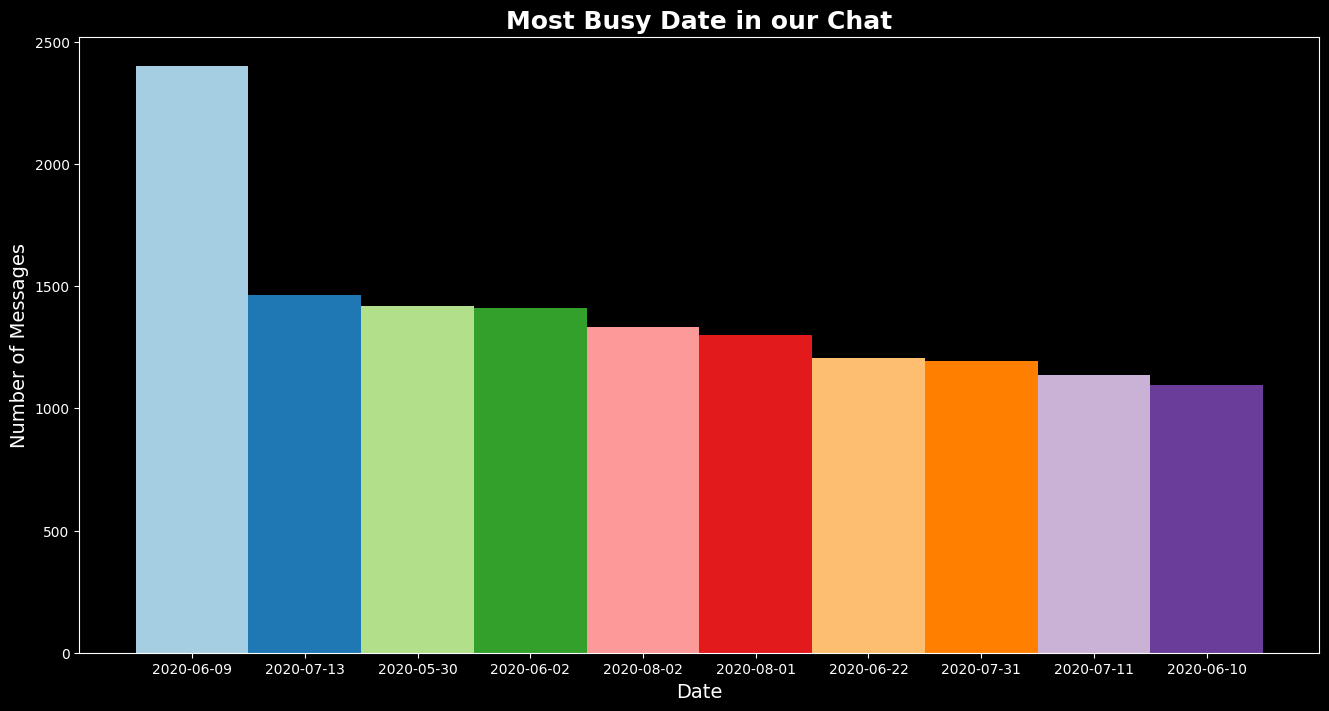

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(bussiest_date.index, bussiest_date.values, color=plt.cm.Paired.colors, width=1.0)
plt.title('Most Busy Date in our Chat', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Messages', fontsize=14)
plt.show()

# **I check this (2020-06-09) date. But on this date i don't find any festivals or any other special thing.**

In [ ]:
# Most Vella Person In Our Chat

most_free_person = df1['names'].value_counts()
most_free_person

,count
names,
Person1,17543
Person4,16683
Person3,13514
Person2,3835


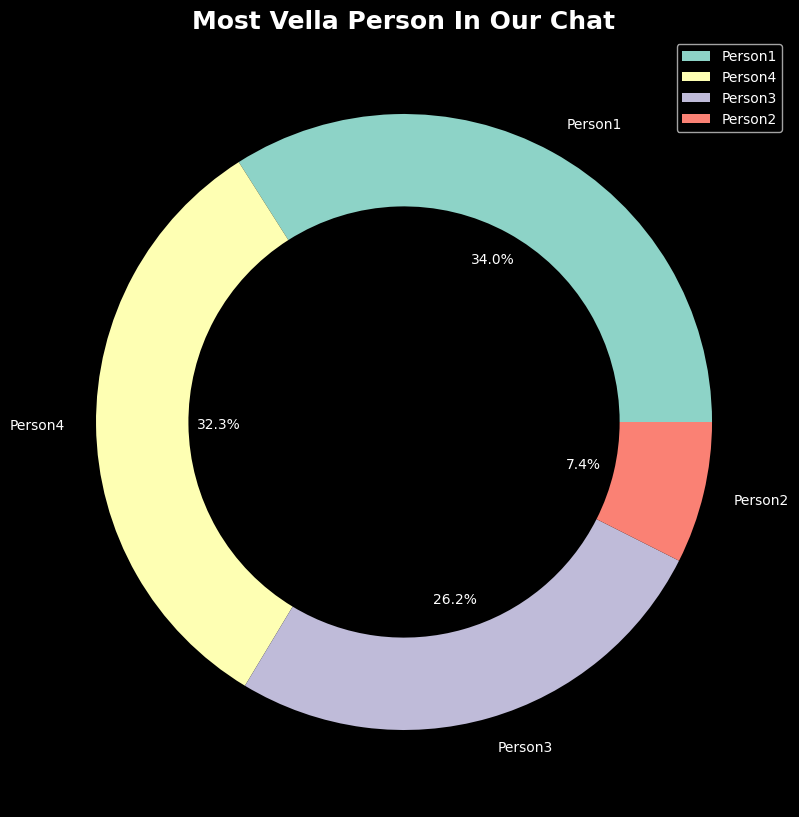

In [ ]:
plt.figure(figsize=(14, 10))
plt.pie(most_free_person.values, labels=most_free_person.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Most Vella Person In Our Chat', fontsize=18, fontweight='bold')
plt.legend(loc='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

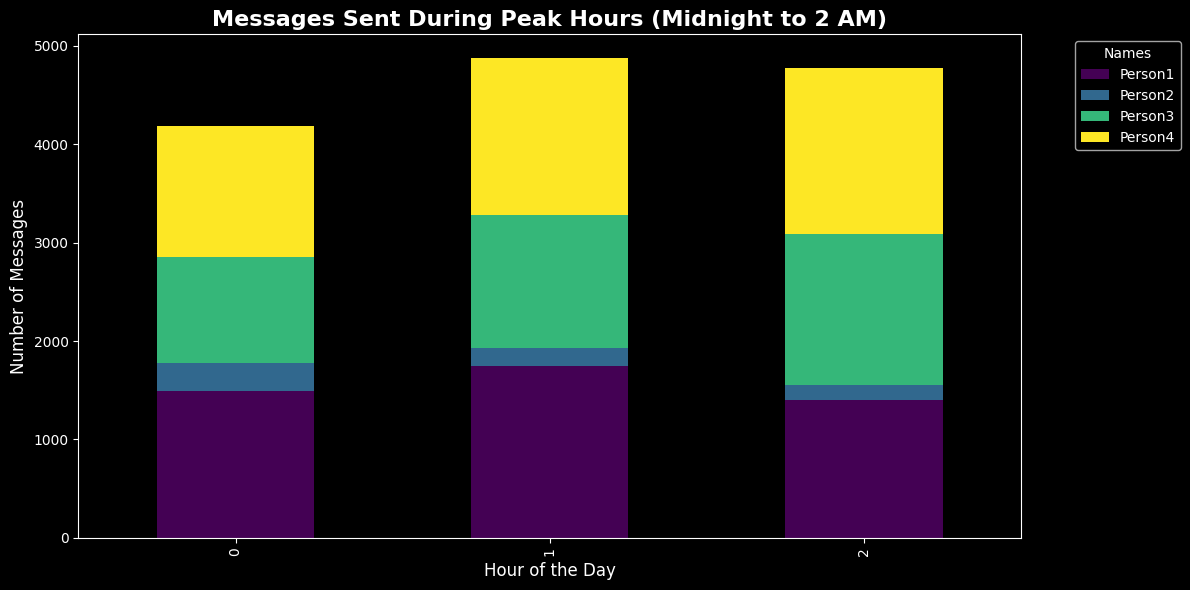

In [ ]:
peak_hours_data = df1[df1['hours'].isin([0, 1, 2])]

peak_hours_grouped = peak_hours_data.groupby(['hours', 'names']).size().unstack()

plt.figure(figsize=(10, 6))
peak_hours_grouped.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title("Messages Sent During Peak Hours (Midnight to 2 AM)", fontsize=16, fontweight='bold')
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.legend(title="Names", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

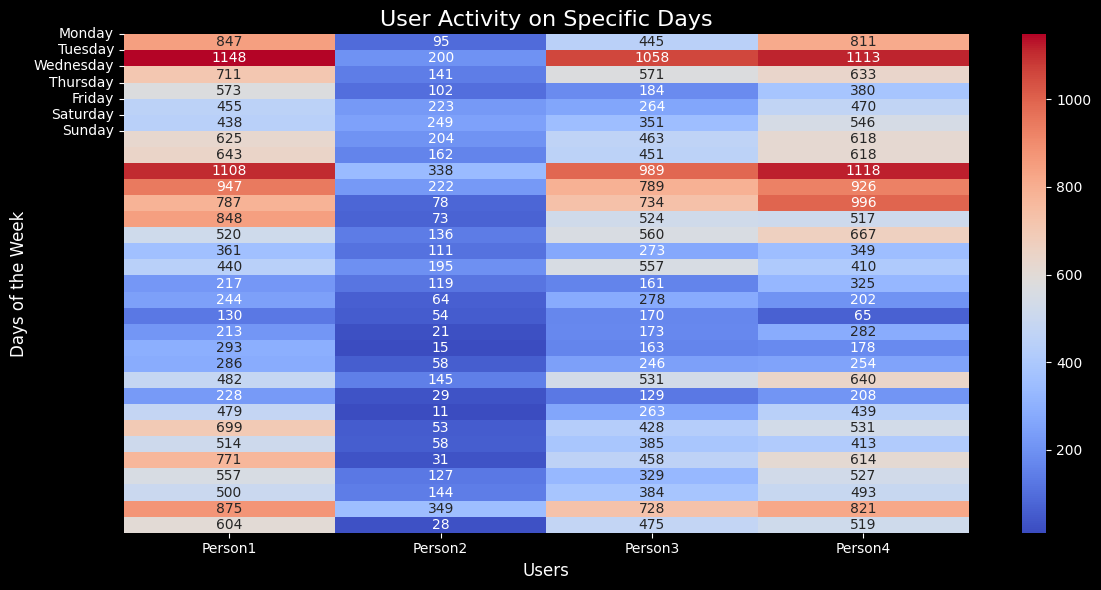

In [ ]:
days_names_grouped = df1.groupby(['days', 'names']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(days_names_grouped, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("User Activity on Specific Days", fontsize=16)
plt.xlabel("Users", fontsize=12)
plt.ylabel("Days of the Week", fontsize=12)
days_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(ticks=range(len(days_labels)), labels=days_labels, rotation=0)
plt.tight_layout()
plt.show()

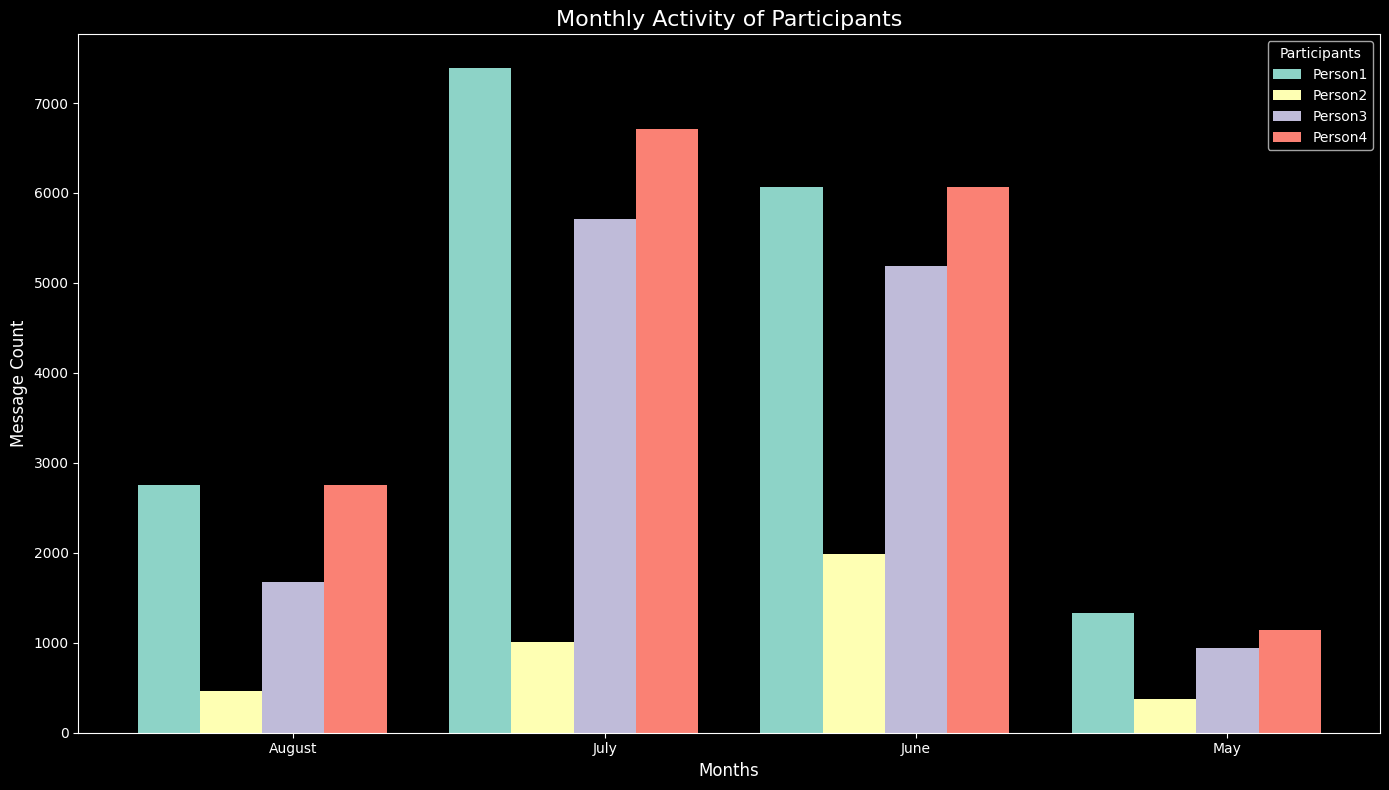

In [ ]:
months_names_grouped = df1.groupby(['months', 'names']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))

months = months_names_grouped.index
participants = months_names_grouped.columns
x = np.arange(len(months))

bar_width = 0.2

for i, participant in enumerate(participants):
    plt.bar(x + i * bar_width, months_names_grouped[participant], width=bar_width, label=participant)

plt.xlabel('Months', fontsize=12)
plt.ylabel('Message Count', fontsize=12)
plt.title('Monthly Activity of Participants', fontsize=16)
plt.xticks(x + bar_width * len(participants) / 2, months)
plt.legend(title="Participants", fontsize=10)
plt.tight_layout()
plt.show()